## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [0.01, 1e-4,1e-8, 1e-12]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1492 - acc: 0.2779 - val_loss: 1.9916 - val_acc: 0.3464
Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.9382 - acc: 0.3671 - val_loss: 1.8885 - val_acc: 0.3904
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8535 - acc: 0.3976 - val_loss: 1.8194 - val_acc: 0.4068
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7965 - acc: 0.4171 - val_loss: 1.7711 - val_acc: 0.4239
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7486 - acc: 0.4332 - val_loss: 1.7336 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7097 - acc: 0.4481 - val_loss: 1.7124 - val_acc: 0.4402
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6772 - acc: 0.4598 - val_loss: 1.6838 - 

Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8015 - acc: 0.3663 - val_loss: 1.7569 - val_acc: 0.3796
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7231 - acc: 0.3952 - val_loss: 1.6841 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6653 - acc: 0.4170 - val_loss: 1.6322 - val_acc: 0.4283
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6168 - acc: 0.4334 - val_loss: 1.6021 - val_acc: 0.4416
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5760 - acc: 0.4467 - val_loss: 1.5678 - val_acc: 0.4488
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5390 - acc: 0.4637 - val_loss: 1.5452 - val_acc: 0.4557
Epoch 8/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5074 - acc: 0.4710 - val_loss: 1.5178 - val_acc: 0.4627
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 146us/step - loss: 1.7342 - acc: 0.3924 - val_loss: 1.7083 - val_acc: 0.4055
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6744 - acc: 0.4114 - val_loss: 1.6454 - val_acc: 0.4242
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6246 - acc: 0.4301 - val_loss: 1.6221 - val_acc: 0.4244
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5844 - acc: 0.4435 - val_loss: 1.5748 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5494 - acc: 0.4558 - val_loss: 1.5531 - val_acc: 0.4555
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5184 - acc: 0.4657 - val_loss: 1.5260 - val_acc: 0.4602
Epoch 9/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4918 - acc: 0.4733 - val_loss: 1.4989 - val_acc: 0.4726
Epoch 10/50
50000/50000 [====================

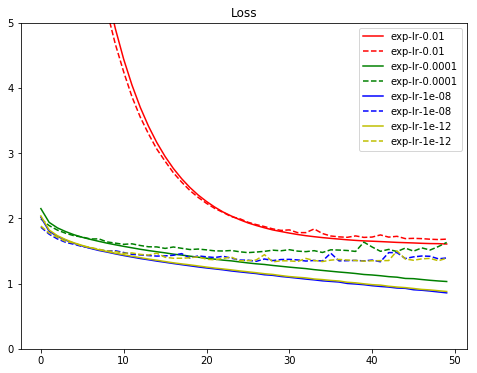

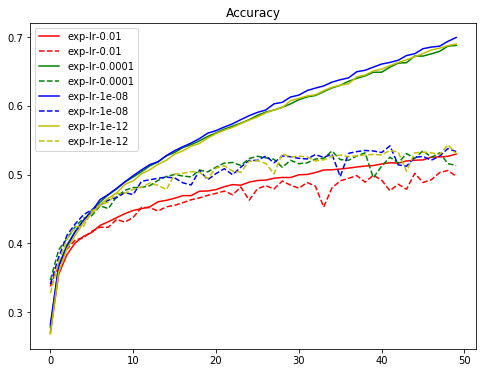

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()